# KPrototype Clustering
### Taking in consideration of only both Numerical and Categorical Data Types

In [1]:
# Basic Libraries
#!pip install kmodes
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from kmodes.kprototypes import KPrototypes
sb.set() # set the default Seaborn style for graphics

In [2]:
student_por = pd.read_csv('student-por.csv',sep=';')
student_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [3]:
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [4]:
student_por['Medu'] = student_por['Medu'].astype(object)
student_por['Fedu'] = student_por['Fedu'].astype(object)
student_por['traveltime'] = student_por['traveltime'].astype(object)
student_por['studytime'] = student_por['studytime'].astype(object)
student_por['famrel'] = student_por['famrel'].astype(object)
student_por['freetime'] = student_por['freetime'].astype(object)
student_por['goout'] = student_por['goout'].astype(object)
student_por['Dalc'] = student_por['Dalc'].astype(object)
student_por['Walc'] = student_por['Walc'].astype(object)
student_por['health'] = student_por['health'].astype(object)

In [5]:
student_por['failures'] = student_por['failures'].astype(float)
student_por['absences'] = student_por['absences'].astype(float)
student_por['G1'] = student_por['G1'].astype(float)
student_por['G2'] = student_por['G2'].astype(float)
student_por['G3'] = student_por['G3'].astype(float)

In [6]:
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   age         649 non-null    int64  
 3   address     649 non-null    object 
 4   famsize     649 non-null    object 
 5   Pstatus     649 non-null    object 
 6   Medu        649 non-null    object 
 7   Fedu        649 non-null    object 
 8   Mjob        649 non-null    object 
 9   Fjob        649 non-null    object 
 10  reason      649 non-null    object 
 11  guardian    649 non-null    object 
 12  traveltime  649 non-null    object 
 13  studytime   649 non-null    object 
 14  failures    649 non-null    float64
 15  schoolsup   649 non-null    object 
 16  famsup      649 non-null    object 
 17  paid        649 non-null    object 
 18  activities  649 non-null    object 
 19  nursery     649 non-null    o

In [7]:
categorical_features = [0,1,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28]
categorical_features

[0,
 1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

Text(0, 0.5, 'Score [WCSS]')

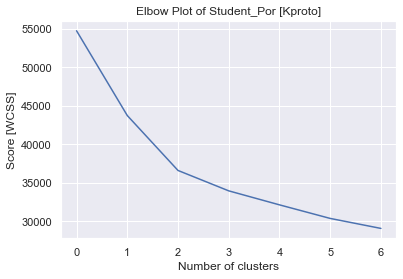

In [8]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(student_por, categorical=categorical_features)
    cost.append(kproto.cost_)

plt.plot(cost)
plt.title('Elbow Plot of Student_Por [Kproto]')
plt.xlabel('Number of clusters')
plt.ylabel('Score [WCSS]')

In [9]:
kproto = KPrototypes(n_clusters=2, verbose=2, max_iter=20)
kproto.fit(student_por, categorical=categorical_features)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 86, ncost: 46148.83467613167
Run: 1, iteration: 2/20, moves: 80, ncost: 44752.50244198458
Run: 1, iteration: 3/20, moves: 56, ncost: 43867.08756010538
Run: 1, iteration: 4/20, moves: 27, ncost: 43753.229999156494
Run: 1, iteration: 5/20, moves: 13, ncost: 43735.87405067195
Run: 1, iteration: 6/20, moves: 5, ncost: 43733.61073105084
Run: 1, iteration: 7/20, moves: 1, ncost: 43733.3965190332
Run: 1, iteration: 8/20, moves: 0, ncost: 43733.3965190332
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 98, ncost: 43891.12019123415
Run: 2, iteration: 2/20, moves: 28, ncost: 43787.63752128441
Run: 2, iteration: 3/20, moves: 10, ncost: 43775.42271868336
Run: 2, iteration: 4/20, moves: 5, ncost: 43770.720518328
Run: 2, iteration: 5/20, moves: 9, ncost: 43753.48043958332
Run: 2, iteration: 6/20, moves: 10, ncost: 43740.206470

KPrototypes(gamma=3.134077723620838, max_iter=20, n_clusters=2, verbose=2)

In [10]:
print(kproto.cluster_centroids_)

[['16.533898305084747' '0.025423728813559324' '1.926553672316384'
  '13.18361581920904' '13.426553672316384' '13.915254237288135' 'GP' 'F'
  'U' 'GT3' 'T' '4' '2' 'other' 'other' 'course' 'mother' '1' '2' 'no'
  'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'no' '4' '3' '3' '1' '1' '5']
 ['16.996610169491525' '0.4576271186440678' '5.738983050847458'
  '9.257627118644068' '9.342372881355931' '9.494915254237288' 'GP' 'F'
  'U' 'GT3' 'T' '1' '1' 'other' 'other' 'course' 'mother' '1' '1' 'no'
  'yes' 'no' 'no' 'yes' 'yes' 'yes' 'no' '4' '3' '3' '1' '1' '5']]


In [11]:
clusters = kproto.predict(student_por, categorical=categorical_features)
student_por['cluster'] = list(clusters)

In [12]:
student_por[student_por['cluster']== 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cluster
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6.0,12.0,13.0,12.0,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0.0,14.0,14.0,14.0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0.0,11.0,13.0,13.0,0
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,6.0,12.0,12.0,13.0,0
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0.0,13.0,12.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,MS,F,18,U,GT3,T,3,3,other,other,...,1,3,1,2,1,1.0,16.0,16.0,16.0,0
636,MS,M,18,U,GT3,T,4,4,teacher,teacher,...,2,4,1,4,2,4.0,17.0,18.0,19.0,0
638,MS,M,17,U,GT3,T,2,3,other,services,...,4,3,1,1,3,4.0,14.0,15.0,16.0,0
641,MS,F,18,R,GT3,T,2,2,at_home,other,...,3,3,1,3,4,0.0,14.0,17.0,15.0,0


In [13]:
student_por[student_por['cluster']== 1]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cluster
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4.0,0.0,11.0,11.0,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2.0,9.0,11.0,11.0,1
18,GP,M,17,U,GT3,T,3,2,services,services,...,5,5,2,4,5,2.0,8.0,8.0,7.0,1
23,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,2,4,5,2.0,10.0,10.0,10.0,1
24,GP,F,15,R,GT3,T,2,4,services,health,...,3,2,1,1,5,2.0,10.0,11.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,MS,F,18,R,GT3,T,4,4,teacher,at_home,...,4,3,2,2,5,4.0,7.0,9.0,10.0,1
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4.0,10.0,11.0,10.0,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6.0,11.0,12.0,9.0,1
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6.0,10.0,10.0,10.0,1


In [14]:
290+359

649

In [15]:
cluster1 = student_por[student_por['cluster'] == 0]
cluster2 = student_por[student_por['cluster'] == 1]

In [16]:
cluster1.describe()

,age,failures,absences,G1,G2,G3,cluster
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.0
mean,16.533898,0.025424,1.926554,13.183616,13.426554,13.915254,0.0
std,1.134188,0.190208,2.590072,1.973669,2.034121,2.002447,0.0
min,15.000000,0.000000,0.000000,8.000000,9.000000,10.000000,0.0
25%,16.000000,0.000000,0.000000,12.000000,12.000000,12.000000,0.0
50%,16.000000,0.000000,0.000000,13.000000,13.000000,14.000000,0.0
75%,17.000000,0.000000,4.000000,14.000000,15.000000,15.000000,0.0
max,21.000000,2.000000,14.000000,19.000000,19.000000,19.000000,0.0


In [17]:
cluster2.describe()

,age,failures,absences,G1,G2,G3,cluster
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.0
mean,16.996610,0.457627,5.738983,9.257627,9.342373,9.494915,1.0
std,1.268397,0.793726,5.608819,1.870302,2.147947,2.737832,0.0
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,16.000000,0.000000,2.000000,8.000000,9.000000,9.000000,1.0
50%,17.000000,0.000000,4.000000,9.000000,10.000000,10.000000,1.0
75%,18.000000,1.000000,8.000000,10.000000,11.000000,11.000000,1.0
max,22.000000,3.000000,32.000000,15.000000,15.000000,16.000000,1.0


In [18]:
colors = ['#DF2020', '#81DF20'] #Red, green
student_por['c'] = student_por.cluster.map({0:colors[1], 1:colors[0]})

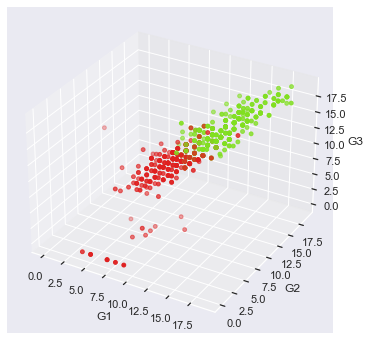

In [19]:
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(student_por.G1, student_por.G2, student_por.G3, c=student_por.c, s=15)
ax.set_xlabel('G1')
ax.set_ylabel('G2')
ax.set_zlabel('G3')
plt.show()

# As seen from plot above
Green has a cluster size of 290    
Red has a cluster size of 359  
Green has the higher mean score for G1 to G3  
Red has the lower mean score for G1 to G3  

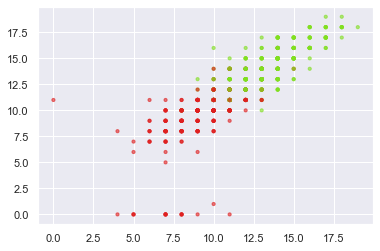

In [20]:
plt.scatter(student_por.G1, student_por.G3, c=student_por.c, alpha = 0.6, s=10)

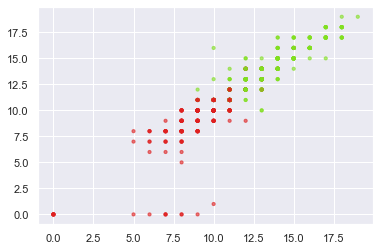

In [21]:
plt.scatter(student_por.G2, student_por.G3, c=student_por.c, alpha = 0.6, s=10)

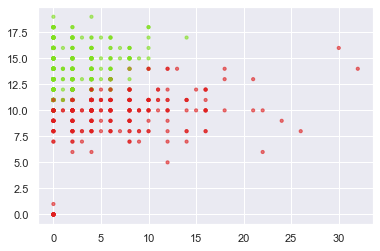

In [22]:
plt.scatter(student_por.absences, student_por.G3, c=student_por.c, alpha = 0.6, s=10)

In [23]:
def checkpercent(columnname):
    frame = pd.crosstab(index=columnname, columns='count')
    #health = health['count']
    frame['index'] = frame.index
    total = sum(frame['count'])
    percentages = []
    for i in (frame.index):
        percentages.append(frame['count'][i]/total*100)
    frame['percent'] = percentages
    print(frame)

In [24]:
for i in student_por:
    #if(student_por[i])
    print(i)
    checkpercent(cluster1[i])
    checkpercent(cluster2[i])
    print()
    print()
    print()

school
col_0   count index    percent
school                        
GP        267    GP  75.423729
MS         87    MS  24.576271
col_0   count index    percent
school                        
GP        156    GP  52.881356
MS        139    MS  47.118644



sex
col_0  count index    percent
sex                          
F        224     F  63.276836
M        130     M  36.723164
col_0  count index    percent
sex                          
F        159     F  53.898305
M        136     M  46.101695



age
col_0  count  index    percent
age                           
15        75     15  21.186441
16       105     16  29.661017
17        97     17  27.401130
18        68     18  19.209040
19         6     19   1.694915
20         2     20   0.564972
21         1     21   0.282486
col_0  count  index    percent
age                           
15        37     15  12.542373
16        72     16  24.406780
17        82     17  27.796610
18        72     18  24.406780
19        26     19   8.81

col_0  count  index    percent
Walc                          
1         90      1  30.508475
2         66      2  22.372881
3         55      3  18.644068
4         54      4  18.305085
5         30      5  10.169492



health
col_0   count  index    percent
health                         
1          56      1  15.819209
2          45      2  12.711864
3          59      3  16.666667
4          64      4  18.079096
5         130      5  36.723164
col_0   count  index    percent
health                         
1          34      1  11.525424
2          33      2  11.186441
3          65      3  22.033898
4          44      4  14.915254
5         119      5  40.338983



absences
col_0     count  index    percent
absences                         
0.0         180    0.0  50.847458
1.0           9    1.0   2.542373
2.0          70    2.0  19.774011
3.0           2    3.0   0.564972
4.0          44    4.0  12.429379
5.0           4    5.0   1.129944
6.0          23    6.0   6.497175
7.0    

KeyError: 'c'

# Noticeable trends
Medu, Fedu, Mjob, reason, studytime, failures, activities*, higher, internet, Dalc, Walc

In [25]:
def percent(columnname):
    df = pd.DataFrame()
    frame = pd.crosstab(index=columnname, columns='count')
    #health = health['count']
    frame['index'] = frame.index
    total = sum(frame['count'])
    percentages = []
    for i in (frame.index):
        percentages.append(frame['count'][i]/total*100)
    frame['percent'] = percentages
    df['Variables'] = frame['index']
    df['Percentages'] = frame['percent']
    return df

In [26]:
def plot (varname):
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))
    axs[0].set_ylim([0,100])
    axs[1].set_ylim([0,100])
    newdf1 = pd.DataFrame()
    newdf2 = pd.DataFrame()
    newdf1 = percent(cluster1[varname])
    newdf2 = percent(cluster2[varname])
    axs[0].set_xlim([1,len(newdf1.iloc[:,0].value_counts())])
    axs[1].set_xlim([1,len(newdf2.iloc[:,0].value_counts())])
    axs[0].set_title('Cluster 1 - {size} entries'.format(size = len(cluster1)))
    axs[1].set_title('Cluster 2 - {size} entries'.format(size = len(cluster2)))
    newdf1[['Percentages']].plot(ax=axs[0], kind='bar')
    newdf2[['Percentages']].plot(ax=axs[1], kind='bar')
    

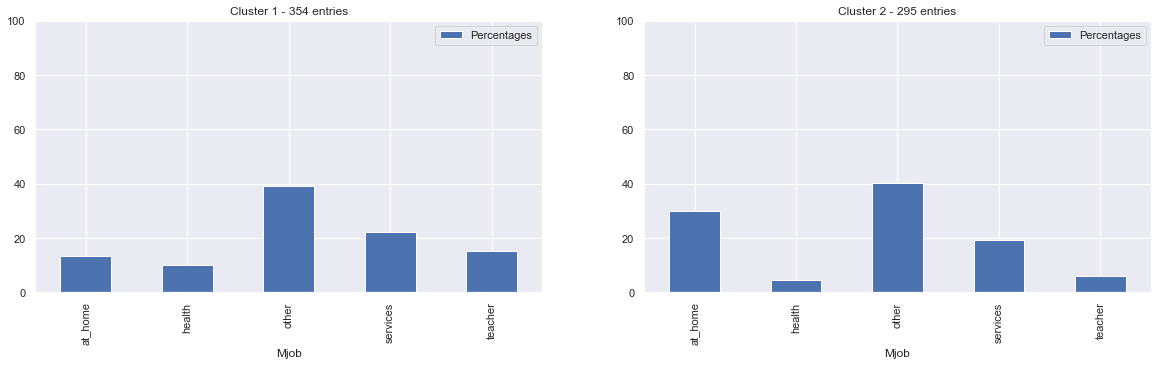

In [27]:
plot('Mjob')

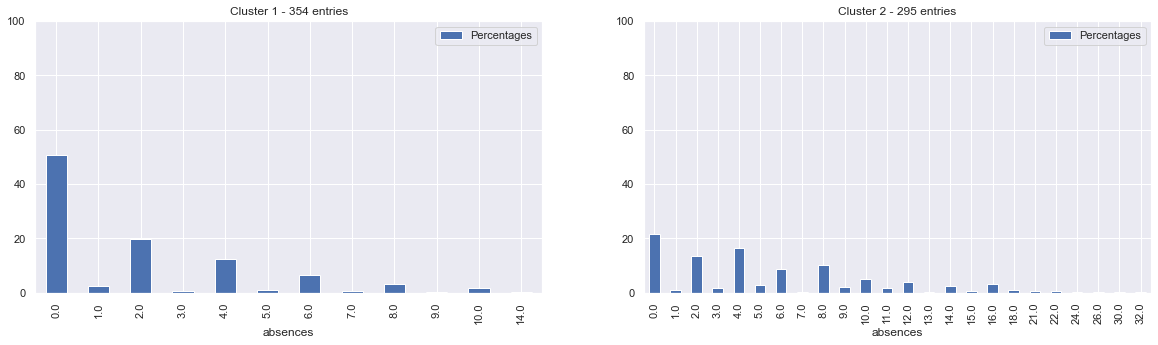

In [28]:
plot('absences')